In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('/content/Airbnb__Open_Data.csv', low_memory = False)

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [15]:
df.drop_duplicates(inplace = True)

df.dropna(inplace = True)

df = df.drop(df[df['availability 365'] > 500].index)

In [16]:
df.duplicated().value_counts()

,count
False,83411


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83411 non-null  int64  
 1   NAME                            83411 non-null  object 
 2   host id                         83411 non-null  int64  
 3   host_identity_verified          83411 non-null  object 
 4   host name                       83411 non-null  object 
 5   neighbourhood group             83411 non-null  object 
 6   neighbourhood                   83411 non-null  object 
 7   lat                             83411 non-null  float64
 8   long                            83411 non-null  float64
 9   country                         83411 non-null  object 
 10  country code                    83411 non-null  object 
 11  instant_bookable                83411 non-null  object 
 12  cancellation_policy             8341

In [18]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,8.341100e+04,8.341100e+04,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000
mean,2.957456e+07,4.918552e+10,40.727353,-73.948500,2012.488509,7.405366,32.276642,1.377584,3.278776,7.032682,141.742612
std,1.621867e+07,2.853608e+10,0.056324,0.050347,5.760870,28.102221,51.957777,1.751041,1.283599,29.551590,133.368399
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,2003.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.541388e+07,2.444891e+10,40.687650,-73.982110,2007.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000
50%,3.075760e+07,4.902681e+10,40.721320,-73.953720,2012.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000
75%,4.331525e+07,7.385102e+10,40.762595,-73.930815,2017.000000,5.000000,38.000000,2.010000,4.000000,2.000000,266.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [19]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


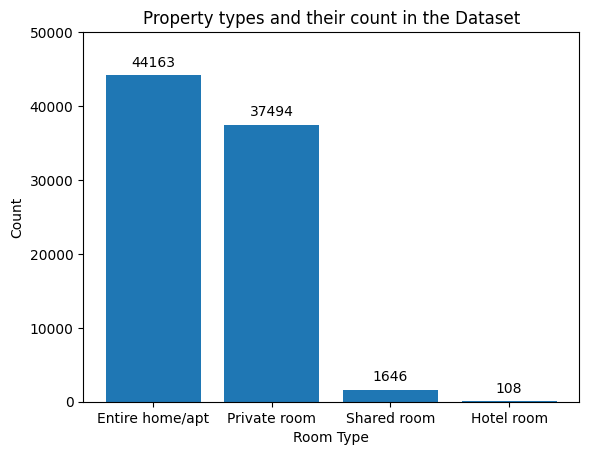

In [22]:
room_type_bar = plt.bar(property_types.index, property_types["count"]);
plt.bar_label(room_type_bar, labels = property_types["count"], padding = 4);
plt.ylim([0, 50000]);
plt.xlabel('Room Type');
plt.ylabel('Count');
plt.title('Property types and their count in the Dataset');
plt.show();

In [23]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34635
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816
brookln,1


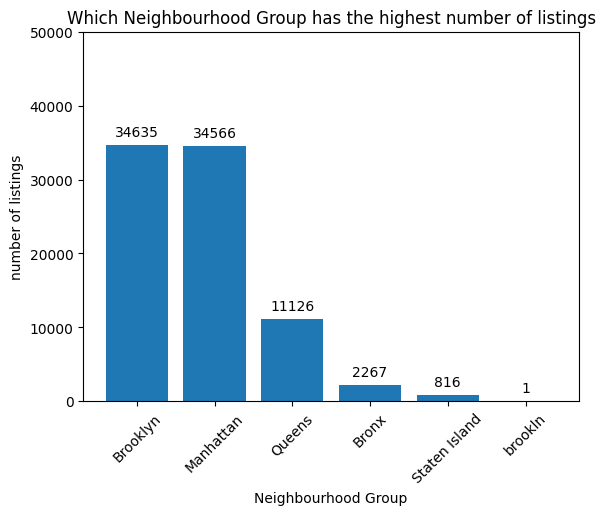

In [24]:
hood_group_bar = plt.bar(hood_group.index, hood_group["count"]);
plt.bar_label(hood_group_bar, labels = hood_group["count"], padding = 4);
plt.ylim([0, 50000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('number of listings');
plt.xticks(rotation = 45);
plt.title('Which Neighbourhood Group has the highest number of listings');
plt.show();

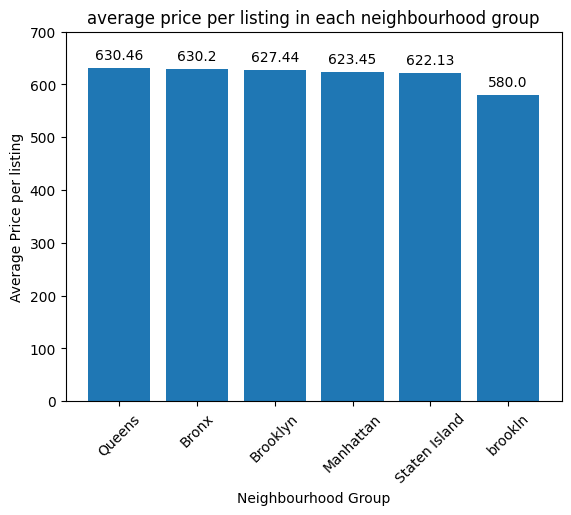

In [28]:

df['price'] = df['price'].astype(str).str.replace('[$,]', '', regex=True).astype(float)

avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price["price"]);
plt.bar_label(avg_price_bar, labels = round(avg_price["price"], 2), label_type = 'edge', padding = 4);
plt.ylim([0, 700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per listing');
plt.xticks(rotation = 45);
plt.title('average price per listing in each neighbourhood group');
plt.show();

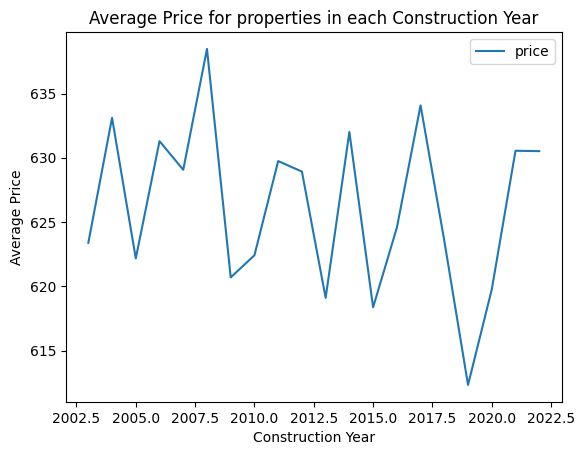

In [30]:
df.groupby(df['Construction year'])['price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price');
plt.title('Average Price for properties in each Construction Year');
plt.show();

In [32]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False ).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


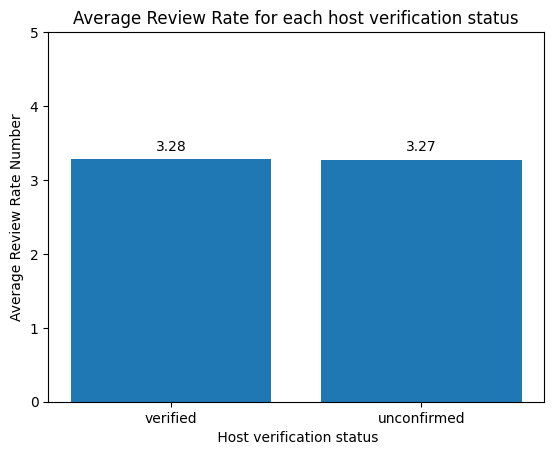

In [33]:
review_bar = plt.bar(review.index, review["review rate number"]);
plt.bar_label(review_bar, labels = round(review["review rate number"], 2), label_type = 'edge', padding = 4);
plt.ylim([0, 5]);
plt.xlabel(' Host verification status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each host verification status');
plt.show();